In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargar archivos de datos
#data = pd.read_table('reno_data_for_unified_analysis.dat',names=['s2','dm','ji'], delim_whitespace=True)
data = pd.read_table('unified_data_from_server_500_x_500.dat',names=['s2','dm','ji'], delim_whitespace=True)

db_data = pd.read_table('db_data.dat',names=['s2','dm','ji'], delim_whitespace=True)

data_cl68 = pd.read_table("../daya_for_global_analysis/db_data/db2018_cl68.dat", names=['s2','dm'], delim_whitespace=True)
data_cl95 = pd.read_table("../daya_for_global_analysis/db_data/db2018_cl95.dat", names=['s2','dm'], delim_whitespace=True)
data_cl99 = pd.read_table("../daya_for_global_analysis/db_data/db2018_cl99.dat", names=['s2','dm'], delim_whitespace=True)

In [3]:
rn_data_cl68 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl68.csv', delim_whitespace=True)
rn_data_cl95 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl95.csv', delim_whitespace=True)
rn_data_cl99 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl99.csv', delim_whitespace=True)

In [4]:
# Daya Bay: Cargar datos de las regiones de confianza
db_cr_68= pd.read_table('db_confidence_region_68.csv', names=['s2','dm'], delim_whitespace=True)
db_cr_95= pd.read_table('db_confidence_region_95.csv', names=['s2','dm'], delim_whitespace=True)
db_cr_99= pd.read_table('db_confidence_region_99.csv', names=['s2','dm'], delim_whitespace=True)

In [5]:
# RENO: Cargar datos de las regiones de confianza
reno_cr_68= pd.read_table('reno_confidence_region_68.dat', names=['s2','dm'], delim_whitespace=True)
reno_cr_95= pd.read_table('reno_confidence_region_95.dat', names=['s2','dm'], delim_whitespace=True)
reno_cr_99= pd.read_table('reno_confidence_region_99.dat', names=['s2','dm'], delim_whitespace=True)

In [6]:
#data= reno_data
#data['ji']=reno_data['ji']+db_data['ji']
#data

In [7]:
# Obtención del ji minímo de los datos y sus correspondientes parámetros de oscilación

s2_min = data.iloc[data['ji'].idxmin()][0]
dm_min = data.iloc[data['ji'].idxmin()][1]
ji_min = data.iloc[data['ji'].idxmin()][2]
s2_min, dm_min, ji_min

(0.08732353617561013, 0.0025684, 163.9162549993371)

In [8]:
# Restando el ji_min a la columna de ji
data['ji']=data['ji']-ji_min
data['ji'].min()

0.0

In [9]:
# Filtrando datos por nivel de confianza

data_68=data[(data['ji'] <=  2.30) & (data['ji'] >=  2.25)][['s2','dm']]
data_95=data[(data['ji'] <=  6.18) & (data['ji'] >=  6.10)][['s2','dm']]
data_99=data[(data['ji'] <= 11.83) & (data['ji'] >= 11.71)][['s2','dm']]

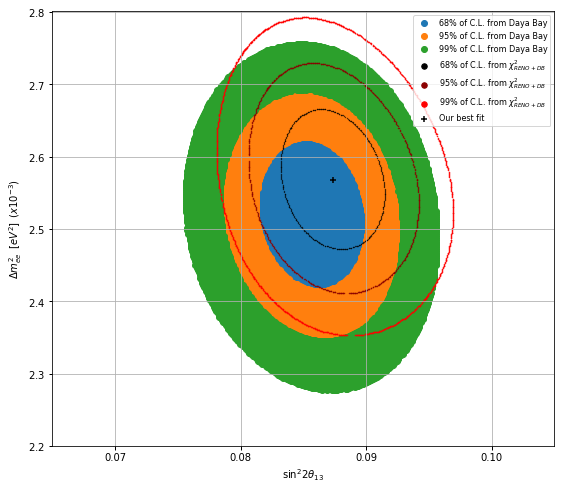

In [10]:
# Graficando datos en regiones de confianza

fig,ax=plt.subplots(figsize=(9, 8))
ax.scatter(data_cl68['s2'].to_numpy(),data_cl68['dm'].to_numpy(),label='68% of C.L. from Daya Bay')
ax.scatter(data_cl95['s2'].to_numpy(),data_cl95['dm'].to_numpy(),label='95% of C.L. from Daya Bay')
ax.scatter(data_cl99['s2'].to_numpy(),data_cl99['dm'].to_numpy(),label='99% of C.L. from Daya Bay')
ax.scatter(  data_68['s2'].to_numpy(),  data_68['dm'].to_numpy(),s=0.1,c='black',  label=r'68% of C.L. from $\chi^2_{RENO+DB}$')
ax.scatter(  data_95['s2'].to_numpy(),  data_95['dm'].to_numpy(),s=0.2,c='darkred',label= '95% of C.L. from $\chi^2_{RENO+DB}$')
ax.scatter(  data_99['s2'].to_numpy(),  data_99['dm'].to_numpy(),s=0.3,c='red',    label= '99% of C.L. from $\chi^2_{RENO+DB}$')
ax.scatter(s2_min,dm_min,c='black',marker='+' ,label='Our best fit')
# Limites en los ejes
ax.set_xlim(0.065, 0.105)
ax.set_ylim(00.0022, 0.002801)

ax.set_xticks([0.07,0.08,0.09,0.1])
ax.set_yticks([0.0022,0.0023,0.0024,0.0025,0.0026,0.0027,0.0028])

ax.set_yticklabels(['$2.2$','$2.3$','$2.4$','$2.5$','$2.6$','$2.7$','$2.8$'])

lgnd=ax.legend()

# Plot legend.
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=8)
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
lgnd.legendHandles[5]._sizes = [30]
lgnd.legendHandles[6]._sizes = [30]

ax.set(xlabel=r'$\sin^2 2\theta_{13}$', ylabel=r'$\Delta m^2_{ee} \hspace{0.5} [eV^{2}] \hspace{0.5} (x10^{-3})$')
ax.grid(True, linestyle='-')
ax.tick_params(labelcolor='black', labelsize=10, width=1)
#fig.savefig("db_confidence_region_cov.eps")
fig.savefig("db_confidence_region_cov.png")
#plt.show()

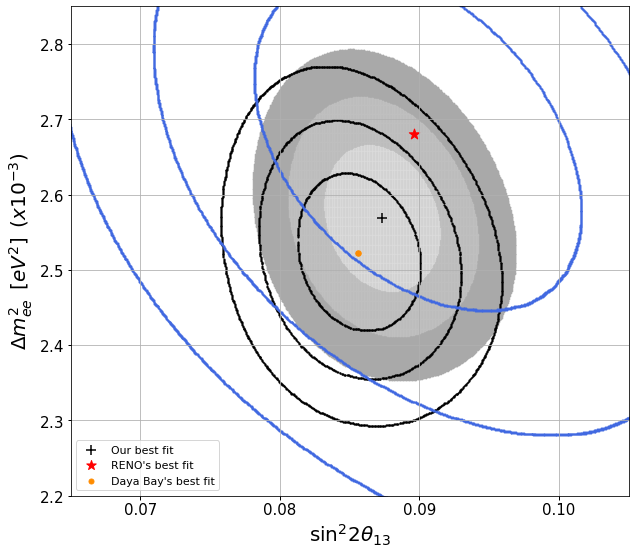

In [11]:
data_68=data[(data['ji'] <=  2.30) ][['s2','dm']]
data_95=data[(data['ji'] <=  6.18) ][['s2','dm']]
data_99=data[(data['ji'] <= 11.83) ][['s2','dm']]

# Graficando datos en regiones de confianza

fig,ax=plt.subplots(figsize=(10, 9))
ax.scatter(  data_99['s2'].to_numpy(),  data_99['dm'].to_numpy(),s=0.3,c='darkgrey')#, label= '99% of C.L. from $\chi^2_{RENO+DB}$')
ax.scatter(  data_95['s2'].to_numpy(),  data_95['dm'].to_numpy(),s=0.2,c='silver')#, label= '95% of C.L. from $\chi^2_{RENO+DB}$')
ax.scatter(  data_68['s2'].to_numpy(),  data_68['dm'].to_numpy(),s=0.1,c='gainsboro')#, label=r'68% of C.L. from $\chi^2_{RENO+DB}$')

ax.scatter(db_cr_68['s2'].to_numpy(),db_cr_68['dm'].to_numpy(),s=1.2,c='black')#,label='68% of C.L. from $\chi^2_{DB}$')
ax.scatter(db_cr_95['s2'].to_numpy(),db_cr_95['dm'].to_numpy(),s=1.2,c='black')#,label='95% of C.L. from $\chi^2_{DB}$')
ax.scatter(db_cr_99['s2'].to_numpy(),db_cr_99['dm'].to_numpy(),s=1.2,c='black')#,label='99% of C.L. from $\chi^2_{DB}$')

ax.scatter(reno_cr_68['s2'].to_numpy(),reno_cr_68['dm'].to_numpy(),s=0.8,c='royalblue')#,label='68% of C.L. from $\chi^2_{RENO}$')
ax.scatter(reno_cr_95['s2'].to_numpy(),reno_cr_95['dm'].to_numpy(),s=0.8,c='royalblue')#,label='95% of C.L. from $\chi^2_{RENO}$')
ax.scatter(reno_cr_99['s2'].to_numpy(),reno_cr_99['dm'].to_numpy(),s=0.8,c='royalblue')#,label='99% of C.L. from $\chi^2_{RENO}$')




ax.scatter(s2_min,dm_min,c='black',marker='+' ,s=120,label='Our best fit')
ax.scatter(0.0896,0.00268,c='red',marker='*' ,s=120,label='RENO\'s best fit')
ax.scatter(0.0856,0.002522,c='darkorange',marker='.' ,s=120,label='Daya Bay\'s best fit')

# Limites en los ejes
ax.set_xlim(0.065, 0.105)
ax.set_ylim(00.0022, 0.00285)

ax.set_xticks([0.07,0.08,0.09,0.1])
ax.set_yticks([0.0022,0.0023,0.0024,0.0025,0.0026,0.0027,0.0028])

ax.set_yticklabels(['$2.2$','$2.3$','$2.4$','$2.5$','$2.6$','$2.7$','$2.8$'])

lgnd=ax.legend()

# Plot legend.
lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=11)
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]
#lgnd.legendHandles[2]._sizes = [30]
#lgnd.legendHandles[3]._sizes = [35]
#lgnd.legendHandles[4]._sizes = [35]
#lgnd.legendHandles[5]._sizes = [35]
#lgnd.legendHandles[6]._sizes = [30]
#lgnd.legendHandles[7]._sizes = [30]
#lgnd.legendHandles[8]._sizes = [30]
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]


ax.set(xlabel=r'$\sin^2 2\theta_{13}$', ylabel=r'$\Delta m^2_{ee} \hspace{0.5} [eV^{2}] \hspace{0.5} (x10^{-3})$')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.grid(True, linestyle='-')
ax.tick_params(labelcolor='black', labelsize=15, width=1)
#fig.savefig("unified_RENO_DB.eps")
fig.savefig("unified_RENO_DB.png")
plt.show()

# Perfil ( $\Delta \chi^2$, $\sin^2 2\theta_{13}$)

In [12]:
# Obtención de datos para el perfil
s2_profile=data[data['dm']==dm_min][['s2','ji']]
parabol_s2=pd.read_table("../daya_for_global_analysis/db_data/db_profile_s2.dat", names=['s2','ji'], delim_whitespace=True)
parabol_s2['ji']=parabol_s2['ji']-parabol_s2['ji'].min()

In [13]:
# Datos del análisis de RENO
rn_parabol_s2 = pd.read_table('parabol_s2_reno.dat', names=['s2','ji'],delim_whitespace=True)
ji_min_s2=rn_parabol_s2['ji'].min()
rn_parabol_s2['ji']=rn_parabol_s2['ji']-ji_min_s2

In [14]:
s2_profile.to_csv('unified_profile_ji_s2_from_python.csv')

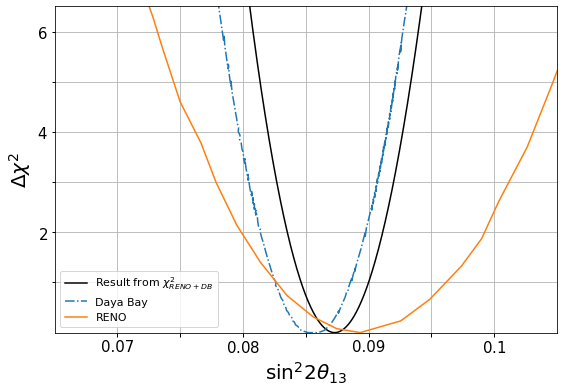

In [15]:
# Gráfica de (  Δ𝜒2 ,  sin22𝜃13 )
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(s2_profile['s2'].to_numpy(),s2_profile['ji'].to_numpy(),c='black',linestyle='-',label=r'Result from $\chi^2_{RENO+DB}$')
ax.plot(parabol_s2['s2'].to_numpy(),parabol_s2['ji'].to_numpy(),linestyle='-.',label=r'Daya Bay')
ax.plot(rn_parabol_s2['s2'].to_numpy(),rn_parabol_s2['ji'].to_numpy(),linestyle='-',label=r'RENO')


ax.legend()
ax.set_xlim(0.065, 0.105)
#ax.set_xlim(0.0, 0.2)
ax.set_ylim(0.0, 6.5)
ax.grid(True, linestyle='-')

ax.set_xticks([0.07,0.075,0.08,0.085,0.09,0.095,0.1])
#ax.set_yticks([1,2,3,4,5,6,7,8,9,10])
ax.set_xticklabels(['0.07','','$0.08$','','0.09','','$0.1$'])
#ax.set_yticklabels(['','$2$','','$4$','','$6$','','$8$','','$10$'])


#ax.set_xticks([0,0.05,0.1,0.15,0.2])
ax.set_yticks([1,2,3,4,5,6])
#ax.set_xticklabels(['0','$0.05$','0.10','$0.15$','0.2'])
ax.set_yticklabels(['','$2$','','$4$','','$6$',''])
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.tick_params(labelcolor='black', labelsize=15, width=1)
lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=11)
ax.set(xlabel=r'$\sin^2 2\theta_{13}$', ylabel=r'$\Delta \chi^2$')
fig.savefig("unified_parabol_s22t13_cov.png")
#fig.savefig("unified_parabol_s22t13_cov.eps")

In [16]:
s2_left=0.08465024412616999#0.08348284536
        
s2_right=0.08998084239643944#0.08891360637179181
         
s2_sigma_left  = s2_min   - s2_left
s2_sigma_right = s2_right - s2_min

(s2_sigma_left,s2_sigma_right)

(0.00267329204944014, 0.0026573062208293113)

In [17]:
# En Daya Bay        (0.003056897895867924, 0.002886573999224068)
# Unified toy model  (, )
# Unified full model (0.002673292049440140, 0.002657306220829311)

# Perfil( $\Delta \chi^2$, $\Delta m^2_{ee}$)

In [18]:
# Obtención de datos para el perfil
dm_profile=data[data['s2']==s2_min][['dm','ji']]
parabol_dmee=pd.read_table('../daya_for_global_analysis/db_data/db_profile_dm.dat',names=['dm','ji'],delim_whitespace=True)

In [19]:
dm_profile.to_csv('unified_profile_ji_dm_from_python.csv')

In [20]:
# Datos del análisis de RENO

rn_parabol_dmee = pd.read_table('parabol_dmee_reno.dat', names=['dm','ji'],delim_whitespace=True)
ji_min_dm=rn_parabol_dmee['ji'].min()
rn_parabol_dmee['ji']=rn_parabol_dmee['ji']-ji_min_dm

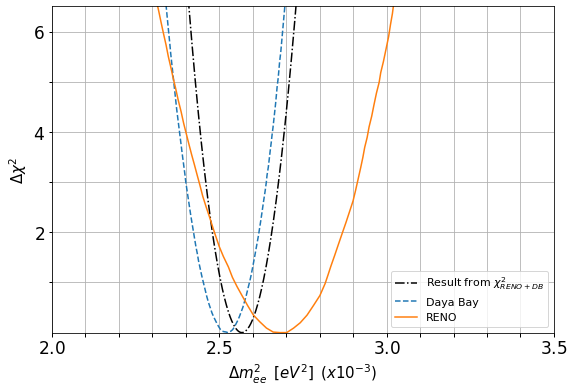

In [21]:
#Gráfica
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(dm_profile['dm'],dm_profile['ji'],c='black',linestyle='-.',label=r'Result from $\chi^2_{RENO+DB}$')
ax.plot(parabol_dmee['dm'].to_numpy(),parabol_dmee['ji'].to_numpy(),linestyle='--',label=r'Daya Bay')
ax.plot(rn_parabol_dmee['dm'].to_numpy(),rn_parabol_dmee['ji'].to_numpy(),linestyle='-',label=r'RENO')


ax.legend()
#ax.set_xlim(0.00215, 0.00285)  # From Daya Bay
#ax.set_ylim(0.0, 10)           # From Daya Bay

ax.set_xlim(0.002, 0.0035)       # From RENO
ax.set_ylim(0.0, 6.5)           # From RENO
ax.grid(True, linestyle='-')

#ax.set_xticks([0.0022,0.0023,0.0024,0.0025,0.0026,0.0027,0.0028])
#ax.set_yticks([1,2,3,4,5,6,7,8,9,10])
#ax.set_xticklabels(['$2.2$','$2.3$','$2.4$','$2.5$','$2.6$','$2.7$','$2.8$'])
#ax.set_yticklabels(['','$2$','','$4$','','$6$','','$8$','','$10$'])



ax.set_xticks([0.002,0.0021,0.0022,0.0023,0.0024,0.0025,0.0026,0.0027,0.0028,0.0029,0.003,0.0031,0.0032,0.0033,0.0034,0.0035,])
ax.set_yticks([1,2,3,4,5,6])
ax.set_xticklabels(['$2.0$','','','','','$2.5$','','','','','$3.0$','','','','','$3.5$'])
ax.set_yticklabels(['','$2$','','$4$','','$6$',''])

ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(labelcolor='black', labelsize=17, width=1)
lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=11)
ax.set(xlabel=r'$\Delta m^2_{ee} \hspace{0.5} [eV^{2}] \hspace{0.5} (x10^{-3})$', ylabel=r'$\Delta \chi^2 $')
fig.savefig("unified_parabol_dmee_cov.png")
#fig.savefig("unified_parabol_dmee_cov.eps")

In [22]:
dm_left = 0.0025048#0.0024964

dm_right= 0.0026308#0.00262

dm_sigma_left=dm_min-dm_left
dm_sigma_right=dm_right-dm_min

(dm_sigma_left,dm_sigma_right)

(6.360000000000003e-05, 6.239999999999978e-05)

In [23]:
#En Daya Bay         (6.871071346441302e-05, 6.957583649534575e-05)
#UNified full model  (6.360000000000003e-05, 6.239999999999978e-05)